# Python 奨学金コンペ 　

## 📖 背景
DataCamp主催のPython奨学金コンペです。課題は、Python入門とSQL入門で得た知識を使い、PythonおよびSQLスキルを使い、問題解決力や創造的思考と組み合わせ問題を解いてください。この奨学金は、中等教育を修了または修了中で、コンピューターサイエンスまたはデータサイエンスの学位取得を考えている人を対象としています。

## 💡詳細はこちら

次のDataCampコースが、この課題に必要なスキルなります。

* [Introduction to Python](https://www.datacamp.com/courses/introduction-to-python)
* [Introduction to SQL](https://www.datacamp.com/courses/introduction-to-sql)

## 🧑‍⚖️ 評価基準
<p>&nbsp;</p>
<p><strong>公開し、賛成票を獲得しなさい。
    
    - 最も賛成票が多かった上位100件が、2次の審査に進みます。 
    - 投票開始前に登録されたアカウントによって行われた投票が可能です。


| **品質** | 65% | <ul><li> 精度 (20%) - エラーがない必要があります。</li><li> 明確さ (20%) - 理解しやすく、明確に表現されている必要があります。 </li><li> 完全性 (15%) - 回答は、提示された質問に答える完全なレポートである必要があります。</li><li> 洞察 (10%) - 回答には、データに基づいた洞察が含まれている必要があります。</li></ul> 
| **分析の内容** | 20% | <ul><li>データは分析に関係しているか。 </li><li>全体の解答が完結できているか。</li><li>レポートには十分な深さが含まれていますが、簡潔でもあるか。</li> </ul> 
| **プレゼンテーション** | 15% | <ul><li>どの程度読みやすく、理解しやすいか。</li><li>適切にフォーマットされているか。</li><li>スペルと文法は正しいか。</li></ul> 

## 📘 ルール


- すべての回答は英語で提出する必要があります。

- コンテストにはスキルの要素が強く、Python入門およびSQL入門コースを完了することをお勧めします。
- 参加者は次の条件を満たす必要があります。
- ※18歳以上。
- 大学院教育プログラムを検討していること。

## 😤コンペ開始

## 1️⃣ Pythonを使い、CO2 排出量を求めよ。


## 📖 ストーリー
あなたはカナダの公共政策擁護団体のボランティアとして活動しています。同僚からCO2排出規制に関するガイドラインの推奨事項の作成を手伝ってほしいと頼まれました。同僚は、カナダのさまざまな車両の排出ガスデータを調査した後、どの車両の排出ガスが少ないかを調査したいと考えています。

## 💾 データI

### カナダで使われた車両の7年間の CO2 排出量データにアクセスできます。 ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - 車両を製造する会社
- "Model" - 車両のモデル
- "Vehicle Class" - 用途、容量、重量による車両クラス
- "Engine Size(L)" - エンジンの排気量(リットル)
- "Cylinders" - シリンダーの数
- "Transmission" - トランスミッションのタイプ: A = オートマチック、AM = オートマチックマニュアル、AS = セレクトシフト付きオートマチック、AV = 連続可変、M = マニュアル（3～10 = ギア数）
- "Fuel Type" - 燃料タイプ: X = レギュラー ガソリン、Z = プレミアム ガソリン、D = ディーゼル、E = エタノール (E85)、N = 天然ガス
- "Fuel Consumption Comb (L/100 km)" - 市街地/高速道路 (55%/45%) を組み合わせた 100 km あたりのリットル単位の燃料消費量 (L/100 km)
- "CO2 Emissions(g/km)" - 市街地走行と高速道路走行を組み合わせた場合の、テールパイプからの二酸化炭素排出量 (1 キロメートルあたりのグラム数)


データはカナダ政府のオープンデータから取得しました。[website](https://open.canada.ca/en).

## データ検証＆環境構築

In [2]:
# pandas および numpy パッケージをインポート
import pandas as pd
import numpy as np
import sqlite3

# データをローディング
df_cars = pd.read_csv('data/co2_emissions_canada.csv')

# numpy 配列を作成
cars_makes = df_cars['Make'].to_numpy()
cars_models = df_cars['Model'].to_numpy()
cars_classes = df_cars['Vehicle Class'].to_numpy()
cars_engine_sizes = df_cars['Engine Size(L)'].to_numpy()
cars_cylinders = df_cars['Cylinders'].to_numpy()
cars_transmissions = df_cars['Transmission'].to_numpy()
cars_fuel_types = df_cars['Fuel Type'].to_numpy()
cars_fuel_consumption = df_cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = df_cars['CO2 Emissions(g/km)'].to_numpy()

# データフレームをプレビュー
df_cars.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0         Z                               8.5                  196  
1         Z                               9.6                  221  
2         Z                               5.9                  136  
3         Z                              11.1                  255  
4         Z                              10.6                  244

In [3]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [4]:
df_cars.shape

(7385, 9)

In [5]:
df_cars.describe()

Engine Size(L)    Cylinders  Fuel Consumption Comb (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         10.975071   
std          1.354170     1.828307                          2.892506   
min          0.900000     3.000000                          4.100000   
25%          2.000000     4.000000                          8.900000   
50%          3.000000     6.000000                         10.600000   
75%          3.700000     6.000000                         12.600000   
max          8.400000    16.000000                         26.100000   

       CO2 Emissions(g/km)  
count          7385.000000  
mean            250.584699  
std              58.512679  
min              96.000000  
25%             208.000000  
50%             246.000000  
75%             288.000000  
max             522.000000

In [6]:
# CO2排出量配列の最初の10項目を表示（テスト）
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

In [7]:
check = np.unique(cars_classes)
check

array(['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
       'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
       'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER'],
      dtype=object)

### データ検証の結果

- 特に欠損値があるわけでもなく、すごく綺麗なデータだったのでこのまま問題に入っていこうと思います。

## 💪 チャレンジ問題
同僚がCO2排出量の少ない車両の種類について分からず困っているようです。以下の事を知りたいです：

1. 全ての車のエンジンサイズの中央値は何リットルですか?
2. レギュラーガソリン（燃料種類＝X）、プレミアムガソリン（燃料種類＝Z）、エタノール（燃料種類＝E）、軽油（燃料種類＝D）の平均燃費はどれくらいですか？ 
3. 燃料消費量とCO2排出量の相関関係は何ですか?
4. SUV-SMALLとMID-SIZEのどちらの車両クラスが平均CO2排出量が少ないですか?
5. すべての車両の平均CO2排出量はどれくらいですか? エンジンサイズが2.0リッター以下の車両の排出量に違いはありますかか？
6. 分析中に他に発見した事はありますか?

1. 全ての車のエンジンサイズの中央値は何リットルですか?

In [8]:
# 必要があるすべてのライブラリをインポート
import statistics
import math

# 全車の平均エンジンサイズ(L)を抽出
median_engine_size = statistics.mean(cars_engine_sizes)
print(median_engine_size)

3.1600677048070414


2. レギュラーガソリン（燃料種類＝X）、プレミアムガソリン（Z）、エタノール（E）、軽油（D）の平均燃費はどれくらいですか？ 質問に答えるには、cars_fuel_typesからX要素を取得する必要があります。

In [9]:
#全車の平均燃費
all_cars_fuel_average = statistics.mean(cars_fuel_consumption)
print (f"全車の平均燃費: {round(all_cars_fuel_average, 2)} (L/100 km) ")

#燃料の種類: X = レギュラー ガソリン、Z = プレミアム ガソリン、D = ディーゼル、E = エタノール (E85)、N = 天然ガス。

#レギュラーガソリンの平均燃料消費量
X_cars_fuel_average = df_cars[cars_fuel_types == 'X']['Fuel Consumption Comb (L/100 km)'].mean()
print (f"レギュラーガソリンの平均燃費: {round(X_cars_fuel_average, 2)} (L/100 km) ")

#プレミアムガソリンの平均燃料消費量
Z_cars_fuel_average = df_cars[cars_fuel_types == 'Z']['Fuel Consumption Comb (L/100 km)'].mean()
print (f"プレミアムガソリンの平均燃料消費量: {round(Z_cars_fuel_average, 2)} (L/100 km) ")

#ディーゼルガソリンの平均燃料消費量
D_cars_fuel_average = df_cars[cars_fuel_types == 'D']['Fuel Consumption Comb (L/100 km)'].mean()
print (f"ディーゼルガソリンの平均燃料消費量: {round(D_cars_fuel_average, 2)} (L/100 km) ")

#エタノールガソリンの平均燃料消費量
E_cars_fuel_average = df_cars[cars_fuel_types == 'E']['Fuel Consumption Comb (L/100 km)'].mean()
print (f"エタノールガソリンの平均燃料消費量: {round(E_cars_fuel_average, 2)} (L/100 km) ")

#天然ガス燃料消費量
N_cars_fuel_average = df_cars[cars_fuel_types == 'N']['Fuel Consumption Comb (L/100 km)'].mean()
print (f"天然ガス燃料消費量: {round(N_cars_fuel_average, 2)} (L/100 km) ")


全車の平均燃費: 10.98 (L/100 km) 
レギュラーガソリンの平均燃費: 10.08 (L/100 km) 
プレミアムガソリンの平均燃料消費量: 11.42 (L/100 km) 
ディーゼルガソリンの平均燃料消費量: 8.84 (L/100 km) 
エタノールガソリンの平均燃料消費量: 16.86 (L/100 km) 
天然ガス燃料消費量: 12.7 (L/100 km) 


質問の解答から、エタノール車が最も100kmあたりで燃料を消費することがわかります。 次に天然ガス、3番目に燃費が悪いのがプレミアムガソリン。逆に燃費の消費量が少ないのは、ディーゼル車です。 ディーゼル車はどの車よりも二酸化炭素（CO2）の消費量が少ないことがわかります。

3. 燃料消費量とCO2排出量の相関関係があるか調べて下さい。もし関係性がある場合、散布図を使い調べます。自動車が燃料が使えば使うほど、より多くのCO2が排出されると仮定します。

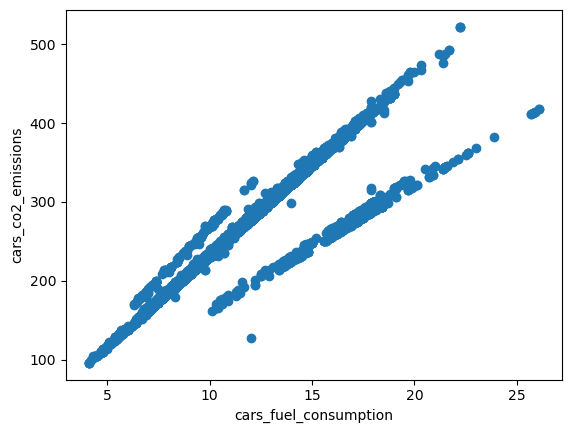

array([[1.        , 0.91805157],
       [0.91805157, 1.        ]])

In [10]:
import matplotlib.pyplot as plt

#グラフを視覚化するために、2 つの変数（cars_fuel_consumption、cars_co2_emissions）を代入
plt.scatter(cars_fuel_consumption, cars_co2_emissions)
plt.xlabel("cars_fuel_consumption")
plt.ylabel("cars_co2_emissions")
plt.show()

#corrcoef関数を使用し、2つの変数間が正の相関か調べます
np.corrcoef(cars_fuel_consumption, cars_co2_emissions)


結果は予測通り、燃費とco2排出量は正の相関があります。 

4. 「SUV-SMALL」と「MID-SIZE」のどちらの車両クラスが平均CO2排出量が低いですか?

In [11]:
# 必要な列をPandas Seriesオブジェクトとして抽出
cars_classes = df_cars['Vehicle Class']
cars_co2_emissions = df_cars['CO2 Emissions(g/km)']

# SUV-SMALL の平均 CO2 排出量を計算
suv_small_co2_average = round(df_cars[cars_classes == 'SUV - SMALL']['CO2 Emissions(g/km)'].mean(), 2)
print(f"SUV-SMALL の平均 CO2 排出量:{suv_small_co2_average}g/km")

#MID-SIZE の平均 CO2 排出量を計算
mid_size_co2_average = round(df_cars[cars_classes == 'MID-SIZE']['CO2 Emissions(g/km)'].mean(), 2)
print(f"MID-SIZE  の平均 CO2 排出量:{mid_size_co2_average}g/km")


SUV-SMALL の平均 CO2 排出量:236.29g/km
MID-SIZE  の平均 CO2 排出量:222.46g/km


MID-SIZE の平均 CO2 排出量の方がSUV-SMALL より、排出量が少ない事がわかります。データを分析結果、小型SUVの方が一般中型車よりも1kmあたりの排出量が多くなりました。

5. すべての車両の平均CO2排出量はどれくらいですか? エンジンサイズが2.0リッター以下の車両の平均CO2排出量も求めて下さい。

In [12]:
#すべての車両の平均CO2排出量。
average_co2_emission = df_cars['CO2 Emissions(g/km)'].mean()
print (f"全車両の平均CO2排出量: {round(average_co2_emission, 2)}g/km")

#エンジンサイズが2.0リッター以下の車両の平均 CO2 排出量。
average_co2_emission_for_small_cars = df_cars[cars_engine_sizes < 2]['CO2 Emissions(g/km)'].mean()
print (f"エンジンサイズが2.0リッター以下の車両の平均CO2排出量: {round(average_co2_emission_for_small_cars,2)}g/km")

全車両の平均CO2排出量: 250.58g/km
エンジンサイズが2.0リッター以下の車両の平均CO2排出量: 180.92g/km


6. 最後に日本車（トヨタ）、アメリカ車（フォード）、どちらの方が、排出ガスが少ないのかを調べてみた後、どの車種が最も環境に悪いかも調べてみます。2社の総合的に比較をし、どれくらい環境に優しい車、あるいは環境に悪い車を作るのかを比べます。

最も環境に悪いトヨタ車は: Sequoia 4WD,CO2排出量は385(g/km)です。
最も環境に悪いフォード車は: E350 WAGON,CO2排出量は488(g/km)です。


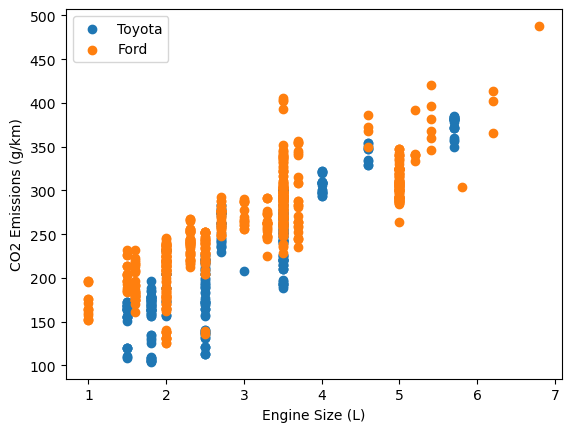

In [13]:
# トヨタ車のみを含む新しいデータフレームを作成
toyota_cars = df_cars[df_cars['Make'] == 'TOYOTA']

# CO2排出量を元に最も環境に悪いトヨタ車を見つける
worst_toyota_car = toyota_cars.loc[toyota_cars['CO2 Emissions(g/km)'].idxmax()]
print(f"最も環境に悪いトヨタ車は: {worst_toyota_car['Model']},CO2排出量は{worst_toyota_car['CO2 Emissions(g/km)']}(g/km)です。")

# フォード車のみを含む新しいデータフレームを作成
ford_cars = df_cars[df_cars['Make'] == 'FORD']

# CO2排出量を元に最も環境に悪いフォード車を見つける
worst_ford_car = ford_cars.loc[ford_cars['CO2 Emissions(g/km)'].idxmax()]
print(f"最も環境に悪いフォード車は: {worst_ford_car['Model']},CO2排出量は{worst_ford_car['CO2 Emissions(g/km)']}(g/km)です。")

# トヨタ車とフォード車のエンジンサイズとCO2排出量の関係をプロット
plt.scatter(toyota_cars['Engine Size(L)'], toyota_cars['CO2 Emissions(g/km)'], label='Toyota')
plt.scatter(ford_cars['Engine Size(L)'], ford_cars['CO2 Emissions(g/km)'], label='Ford')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend()
plt.show()

## 2️⃣ SQL を使い、より深くデータを分析し、理解を深めなさい。

## Jupyter NotebookでSQLを実行し分析

### SQLの環境を構築

In [89]:
#ライブラリをインポート
import sqlite3
# python-sql ライブラリをインストール
!pip install ipython-sql

### データをローディング

In [96]:
# sqlite3ライブラリをコネクト
cnn = sqlite3.connect('car_sample_data.db')

#dfからsqlに変更。一度変更したら変更しないで良い。
#df_cars.to_sql('vehicles', cnn)

#一度ロードしたらロードしないで良い。
%load_ext sql

%sql sqlite:///car_sample_data.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### 環境構築が上手くいったかをテスト

In [97]:
%%sql 
--データ抽出テスト
SELECT * 
FROM vehicles
limit 5

 * sqlite:///car_sample_data.db
Done.


[(0, 'ACURA', 'ILX', 'COMPACT', 2.0, 4, 'AS5', 'Z', 8.5, 196),
 (1, 'ACURA', 'ILX', 'COMPACT', 2.4, 4, 'M6', 'Z', 9.6, 221),
 (2, 'ACURA', 'ILX HYBRID', 'COMPACT', 1.5, 4, 'AV7', 'Z', 5.9, 136),
 (3, 'ACURA', 'MDX 4WD', 'SUV - SMALL', 3.5, 6, 'AS6', 'Z', 11.1, 255),
 (4, 'ACURA', 'RDX AWD', 'SUV - SMALL', 3.5, 6, 'AS6', 'Z', 10.6, 244)]

### 列の名前を変更
ex. Vehicle Class等のコラムのスペースを削除し、新しい名前に変更する。

In [94]:
%%sql
--一度やればコラム名は変更される
--ALTER TABLE vehicles
--RENAME COLUMN 'Transmission' to transmission;

 * sqlite:///car_sample_data.db
Done.


[]

In [149]:
%%sql 
--テスト
SELECT * 
FROM vehicles
LIMIT 5

 * sqlite:///car_sample_data.db
Done.


[(0, 'ACURA', 'ILX', 'COMPACT', 2.0, 4, 'AS5', 'Z', 8.5, 196),
 (1, 'ACURA', 'ILX', 'COMPACT', 2.4, 4, 'M6', 'Z', 9.6, 221),
 (2, 'ACURA', 'ILX HYBRID', 'COMPACT', 1.5, 4, 'AV7', 'Z', 5.9, 136),
 (3, 'ACURA', 'MDX 4WD', 'SUV - SMALL', 3.5, 6, 'AS6', 'Z', 11.1, 255),
 (4, 'ACURA', 'RDX AWD', 'SUV - SMALL', 3.5, 6, 'AS6', 'Z', 10.6, 244)]

## 💪 チャレンジ問題
車の製品を理解できるようにsqlを使いなさい。下記の事を実行しなさい：

1. もっとも大きいエンジンサイズはどの車ですか？
2. 車は合計いくつありますか?
3. CO2の排出量が最も低い車はなんですか?
4. 分析中に発見した洞察はありますか?

1. もっとも大きいエンジンサイズはどの車ですか？

In [148]:
%%sql
SELECT 
    make, 
    model, 
    engine_size,
    co2_emissions
FROM 
    vehicles
ORDER BY 
    engine_size DESC
LIMIT 10

 * sqlite:///car_sample_data.db
Done.


[('SRT', 'VIPER COUPE', 8.4, 389),
 ('SRT', 'VIPER GTS COUPE', 8.4, 389),
 ('DODGE', 'VIPER SRT COUPE', 8.4, 363),
 ('DODGE', 'VIPER SRT', 8.4, 364),
 ('DODGE', 'VIPER', 8.4, 387),
 ('BUGATTI', 'CHIRON', 8.0, 522),
 ('BUGATTI', 'Chiron', 8.0, 522),
 ('BUGATTI', 'Chiron', 8.0, 522),
 ('BENTLEY', 'MULSANNE', 6.8, 437),
 ('FORD', 'E350 WAGON', 6.8, 488)]

2. 車は合計でいくつありますか?

In [47]:
%%sql
SELECT count("index") AS total_column
FROM vehicles;

 * sqlite:///car_sample_data.db
Done.


[(7385,)]

3. CO2の排出量が最も低い車はなんですか?

In [147]:
%%sql
SELECT 
    make, 
    model, 
    engine_size,
    min("co2_emissions") AS min_co2
FROM vehicles;

 * sqlite:///car_sample_data.db
Done.


[('HYUNDAI', 'IONIQ BLUE', 1.6, 96)]

In [145]:
%%sql
SELECT 
    make, 
    model, 
    engine_size,
    co2_emissions
FROM
    vehicles
GROUP BY 
    model 
ORDER BY 
    co2_emissions ASC
LIMIT 10;

 * sqlite:///car_sample_data.db
Done.


[('HYUNDAI', 'IONIQ BLUE', 1.6, 96),
 ('HYUNDAI', 'IONIQ Blue', 1.6, 96),
 ('HYUNDAI', 'IONIQ', 1.6, 103),
 ('TOYOTA', 'Prius', 1.8, 105),
 ('TOYOTA', 'Corolla Hybrid', 1.8, 106),
 ('TOYOTA', 'PRIUS c', 1.5, 108),
 ('TOYOTA', 'Prius AWD', 1.8, 109),
 ('HONDA', 'ACCORD HYBRID', 2.0, 110),
 ('KIA', 'NIRO FE', 1.6, 110),
 ('KIA', 'Niro FE', 1.6, 110)]

4. 分析中に発見した洞察はありますか? メーカー別で一番環境に良い車を調べます。

In [146]:
%%sql
SELECT 
    make,
    model,
    engine_size,
    cylinders,
    fuel_type,
    min(co2_emissions)
FROM
    vehicles
WHERE 
    engine_size < 2.0
GROUP BY 
    make
ORDER BY 
    MAKE ASC
LIMIT 30

 * sqlite:///car_sample_data.db
Done.


[('ACURA', 'ILX HYBRID', 1.5, 4, 'Z', 136),
 ('ALFA ROMEO', '4C', 1.8, 4, 'Z', 193),
 ('AUDI', 'A3', 1.8, 4, 'Z', 200),
 ('BUICK', 'ENCORE SPORT TOURING', 1.4, 4, 'X', 182),
 ('CHEVROLET', 'MALIBU HYBRID', 1.8, 4, 'X', 121),
 ('DODGE', 'DART TURBO AERO', 1.4, 4, 'X', 168),
 ('FIAT', '500 HATCHBACK', 1.4, 4, 'X', 156),
 ('FORD', 'FIESTA SFE', 1.0, 4, 'X', 152),
 ('GMC', 'TERRAIN', 1.6, 4, 'D', 198),
 ('HONDA', 'Insight EX', 1.5, 4, 'X', 114),
 ('HYUNDAI', 'IONIQ BLUE', 1.6, 4, 'X', 96),
 ('JEEP', 'RENEGADE', 1.4, 4, 'X', 202),
 ('KIA', 'NIRO FE', 1.6, 4, 'X', 110),
 ('LEXUS', 'CT 200h', 1.8, 4, 'X', 129),
 ('MAZDA', 'MAZDA2', 1.5, 4, 'X', 170),
 ('MERCEDES-BENZ', 'SLK 250', 1.8, 4, 'Z', 205),
 ('MINI', 'COOPER 3 DOOR', 1.5, 3, 'Z', 163),
 ('MITSUBISHI', 'MIRAGE', 1.2, 3, 'X', 136),
 ('NISSAN', 'VERSA', 1.6, 4, 'X', 152),
 ('SCION', 'iQ', 1.3, 4, 'X', 143),
 ('SMART', 'FORTWO CABRIOLET', 1.0, 3, 'Z', 147),
 ('TOYOTA', 'PRIUS', 1.8, 4, 'X', 104),
 ('VOLKSWAGEN', 'JETTA HYBRID', 1.4, 4, 'Z', 122)]

## データ分析結果

この分析では、データベース内の車両データを使用し、車のメーカーごとに環境に優しい車を見つけることを目的としました。具体的には、エンジンサイズが2.0未満の車種を対象に、CO2排出量の最小値を取得しました。CO2排出量は、車の環境への影響を評価する上で重要な要素の一つです。

分析の結果、メーカーごとに環境に優しい車種を特定することができました。例えば、ACURAのILX HYBRIDは136のCO2排出量で、環境に優しい車として浮上しました。また、ALFA ROMEOの4CやAUDIのA3なども、比較的低いCO2排出量を示しており、環境に配慮した車種と言えます。

さらに、BUICKのENCORE SPORT TOURINGやCHEVROLETのMALIBU HYBRIDなど、他のメーカーのハイブリッド車も環境に優しい選択肢として挙げられました。これらの車種は、燃費効率を高めることでCO2排出量を抑えており、環境への影響を軽減しています。

ただし、データ分析の結果はデータベース内の情報に基づいています。他の要素やデータの特性によって結果は異なる場合があります。また、この分析はエンジンサイズに基づいてフィルタリングを行っていますが、他の要素（燃料タイプ、車種の種類など）を考慮することも重要です。

この分析結果は、各メーカーの環境に優しい車を特定するための出発点となります。さらに詳細な分析や他の要素を考慮した総合的な評価を行うことで、より具体的な結論や意思決定を行うことができます。